**Labelling the categories of Data**

In [1]:
import cv2,os

data_path='bigger_dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


**Summarize the data**

In [2]:
mask_dir = 'D:\\Machine Learning Stuff\\Face Mask Recognizition\\Test Model\\Face Mask Detector Project by Tasnuva Tehrin\\bigger_dataset\\with_mask'
without_mask_dir = 'D:\\Machine Learning Stuff\\Face Mask Recognizition\\Test Model\\Face Mask Detector Project by Tasnuva Tehrin\\bigger_dataset\\with_mask'
# Change the directory paths
with_mask_dir_path = os.path.join(mask_dir)
without_mask_dir_path = os.path.join(without_mask_dir)
with_mask_imgnames = os.listdir( with_mask_dir_path )
without_mask_imgnames = os.listdir( without_mask_dir_path )
print(with_mask_imgnames[:10])
print(without_mask_imgnames[:10])
print('total with mask images :', len(os.listdir(with_mask_dir_path)))
print('total without mask images :', len(os.listdir(without_mask_dir_path)))

['0_0_0 copy 10.jpg', '0_0_0 copy 11.jpg', '0_0_0 copy 12.jpg', '0_0_0 copy 13.jpg', '0_0_0 copy 14.jpg', '0_0_0 copy 15.jpg', '0_0_0 copy 16.jpg', '0_0_0 copy 17.jpg', '0_0_0 copy 18.jpg', '0_0_0 copy 19.jpg']
['0_0_0 copy 10.jpg', '0_0_0 copy 11.jpg', '0_0_0 copy 12.jpg', '0_0_0 copy 13.jpg', '0_0_0 copy 14.jpg', '0_0_0 copy 15.jpg', '0_0_0 copy 16.jpg', '0_0_0 copy 17.jpg', '0_0_0 copy 18.jpg', '0_0_0 copy 19.jpg']
total with mask images : 1915
total without mask images : 1915


**Data Visualization**

In [3]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

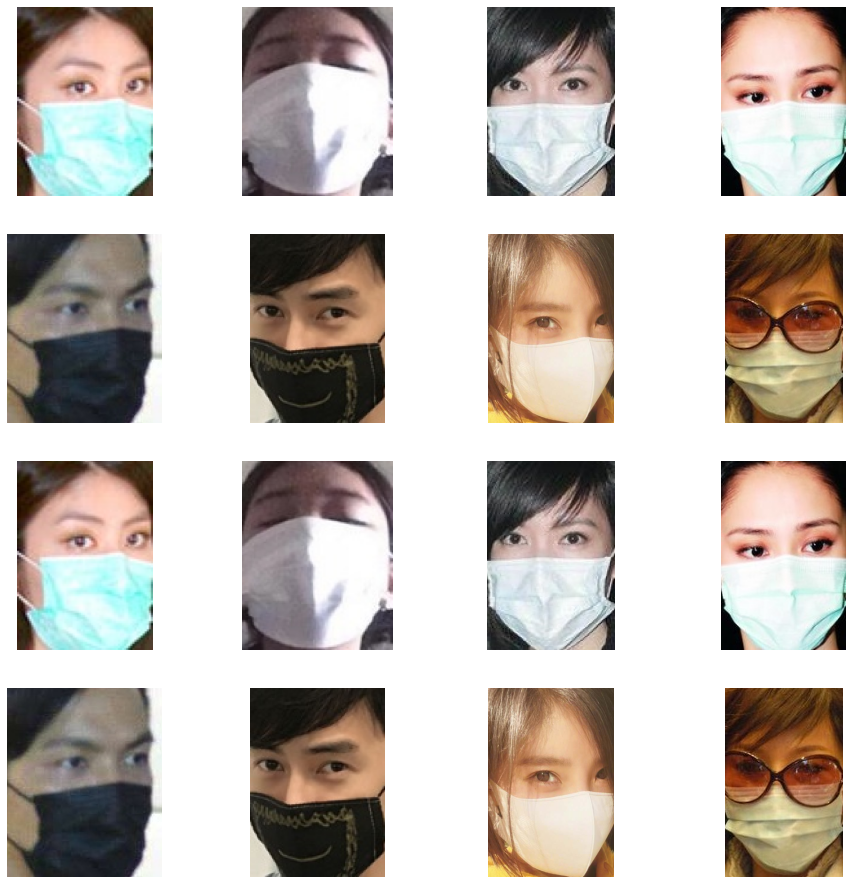

In [4]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

with_mask_pic = [os.path.join(with_mask_dir_path, imgname) 
                for imgname in with_mask_imgnames[ pic_index-8:pic_index] 
               ]

without_mask_pic = [os.path.join(without_mask_dir_path, imgname) 
                for imgname in without_mask_imgnames[ pic_index-8:pic_index]
               ]



for i, img_path in enumerate(with_mask_pic+without_mask_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Converting the Images into Grayscale**

In [5]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::c

**Scaling the Data**

In [6]:
import numpy as np
data = (data - np.mean(data)) / np.std(data)
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

**Reshaping the Data**

In [7]:
import numpy as np


data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [8]:
data.shape

(3810, 100, 100, 1)

**Saving the Data**

In [ ]:
np.save('bigger_set_data',data)
np.save('bigger_set_target',new_target)

**Loading the Data**

In [33]:
import numpy as np

big_data=np.load('bigger_set_data.npy')
big_target=np.load('bigger_set_target.npy')

#loading the save numpy arrays in the previous code

In [34]:
big_data.shape

(3810, 100, 100, 1)

**Splitting the Data**

In [35]:
from sklearn.model_selection import train_test_split

big_train_data,big_test_data,big_train_target,big_test_target=train_test_split(big_data,big_target,test_size=0.2)

In [36]:
big_train_data.shape

(3048, 100, 100, 1)

In [37]:
big_train_data

array([[[[-1.79129324],
         [-1.80512598],
         [-1.80512598],
         ...,
         [-1.66679853],
         [-1.47314011],
         [-1.19648521]],

        [[-1.79129324],
         [-1.80512598],
         [-1.80512598],
         ...,
         [-1.73596226],
         [-1.59763481],
         [-1.33481266]],

        [[-1.79129324],
         [-1.80512598],
         [-1.80512598],
         ...,
         [-1.76362775],
         [-1.59763481],
         [-1.26564893]],

        ...,

        [[ 1.22424514],
         [ 1.15508141],
         [ 1.00292122],
         ...,
         [ 1.21041239],
         [ 1.14124867],
         [ 1.08591769]],

        [[ 1.23807788],
         [ 1.1827469 ],
         [ 1.04441945],
         ...,
         [ 1.23807788],
         [ 1.14124867],
         [ 1.08591769]],

        [[ 1.23807788],
         [ 1.19657965],
         [ 1.09975043],
         ...,
         [ 1.26574337],
         [ 1.15508141],
         [ 1.08591769]]],


       [[[-1.54230383],


In [38]:
big_data.shape[1:]

(100, 100, 1)

## Model Training

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
      ModelCheckpoint('./checkmodel.h5', monitor='val_loss', save_best_only=True, mode='min')
]


big_data_model = Sequential() # create Sequential model
big_data_model.add(Conv2D(32, (3,3), input_shape=big_data.shape[1:], padding='same', activation = 'relu')) 
big_data_model.add(BatchNormalization())
big_data_model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

big_data_model.add(Conv2D(64, (3,3), padding='same',activation = 'relu')) 
big_data_model.add(BatchNormalization())
big_data_model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

big_data_model.add(Conv2D(64, (3,3), padding='same',activation = 'relu')) 
big_data_model.add(BatchNormalization())
big_data_model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))

big_data_model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
big_data_model.add(Dense(2, activation = 'softmax')) 
big_data_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

big_data_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 100, 100, 32)      320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 50, 50, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 64)       

In [42]:
big_data_train_history=big_data_model.fit(big_train_data,big_train_target,epochs=30,callbacks=keras_callbacks,validation_split=0.2)

Epoch 1/30
77/77 [==============================] - 42s 552ms/step - loss: 0.5988 - accuracy: 0.8212 - val_loss: 0.7149 - val_accuracy: 0.5951
Epoch 2/30
77/77 [==============================] - 42s 539ms/step - loss: 0.3869 - accuracy: 0.8999 - val_loss: 0.4866 - val_accuracy: 0.7672
Epoch 3/30
77/77 [==============================] - 43s 565ms/step - loss: 0.2224 - accuracy: 0.9270 - val_loss: 1.0730 - val_accuracy: 0.6295
Epoch 4/30
77/77 [==============================] - 46s 596ms/step - loss: 0.1729 - accuracy: 0.9495 - val_loss: 0.6015 - val_accuracy: 0.7393
Epoch 5/30
77/77 [==============================] - 45s 588ms/step - loss: 0.1557 - accuracy: 0.9557 - val_loss: 0.5261 - val_accuracy: 0.8262
Epoch 6/30
77/77 [==============================] - 44s 567ms/step - loss: 0.0782 - accuracy: 0.9717 - val_loss: 0.4260 - val_accuracy: 0.8803
Epoch 7/30
77/77 [==============================] - 46s 595ms/step - loss: 0.0433 - accuracy: 0.9832 - val_loss: 0.4514 - val_accuracy: 0.8689

## Model Performance Evaluation

In [43]:
print(big_data_model.evaluate(big_train_data,big_train_target))
print(big_data_model.evaluate(big_test_data,big_test_target))

96/96 [==============================] - 6s 64ms/step - loss: 0.0799 - accuracy: 0.9875
[0.0798913836479187, 0.9875327944755554]
24/24 [==============================] - 2s 63ms/step - loss: 0.2864 - accuracy: 0.9409
[0.2863992750644684, 0.9409449100494385]


**Plotting Training  and Validation Loss**

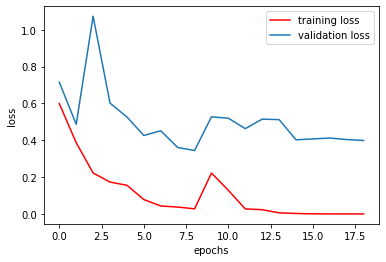

In [44]:
from matplotlib import pyplot as plt

plt.plot(big_data_train_history.history['loss'],'r',label='training loss')
plt.plot(big_data_train_history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**Plotting Training and Validation Accuracy**

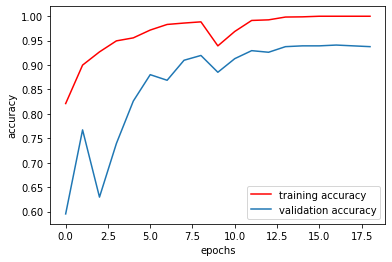

In [45]:
plt.plot(big_data_train_history.history['accuracy'],'r',label='training accuracy')
plt.plot(big_data_train_history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

**Performance Metrices**

In [46]:
import numpy as np
rounded_targets=np.argmax(big_test_target, axis=1)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
big_data_model_classes = big_data_model.predict_classes(big_test_data)
big_data_model_acc = accuracy_score(rounded_targets,big_data_model_classes)
print("Classification Accuracy of the model: ",big_data_model_acc*100,'%')
big_data_model_prec = precision_score(rounded_targets,big_data_model_classes)
print("Precision Score of the model: ",big_data_model_prec*100,'%')
big_data_model_recall = recall_score(rounded_targets,big_data_model_classes)
print("Recall Score of the model: ",big_data_model_recall*100,'%')
big_data_model_f1 = f1_score(rounded_targets,big_data_model_classes)
print("F1 Score of the model: ",big_data_model_f1*100,'%')

Classification Accuracy of the model:  94.09448818897637 %
Precision Score of the model:  94.02173913043478 %
Recall Score of the model:  93.76693766937669 %
F1 Score of the model:  93.89416553595659 %


In [48]:
from sklearn.metrics import classification_report
big_data_model_classification_report = classification_report(rounded_targets,big_data_model_classes)
print("Classification Report: \n",big_data_model_classification_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       393
           1       0.94      0.94      0.94       369

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      0.94      0.94       762



In [49]:
from sklearn.metrics import confusion_matrix
big_data_model_confusion_matrix = confusion_matrix(rounded_targets,big_data_model_classes)
print("Confusion Matrix: \n",big_data_model_confusion_matrix)

Confusion Matrix: 
 [[371  22]
 [ 23 346]]


**Saving the model**

In [ ]:
big_data_model.save("bigger_dataset_model_1.model", save_format="h5",include_optimizer=False)

**Loading the model**

In [1]:
from keras.models import load_model
import numpy as np
import cv2
model = load_model('bigger_dataset_model_1.model',compile=False)

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'NO MASK',1:'MASK'}
color_dict={0:(0,0,255),1:(0,255,0)}

## Checking the model for Images

In [3]:
while(True):

    img=img=cv2.imread('D:\\Machine Learning Stuff\\Face Mask Recognizition\\Test Model\\Face Mask Detector Project by Tasnuva Tehrin\\example_3.jpg')
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

## Checking the model for Live Videos

In [2]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()